# 📘 05_time_series_prediction.ipynb

# Predict traffic zone metrics (e.g., speed or congestion) using models like XGBoost, LSTM, or Prophet.


In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.prediction import run_prediction_pipeline, validate_prediction
import joblib
import pandas as pd


In [2]:
input_path = r"C:\Users\VaishnaviM\Desktop\BIG_DATA\data\processed\clustered_trip_data.parquet"
model_output_path = r"C:\Users\VaishnaviM\Desktop\BIG_DATA\models\xgboost_model.pkl"


Loading clustered data from C:\Users\VaishnaviM\Desktop\BIG_DATA\data\processed\clustered_trip_data.parquet
Preparing features for time series modeling...
Creating lag features: [1, 2, 3]
Training XGBoost model...
XGBoost RMSE: 8.1273
MAE: 2.1432
R²: 0.7342


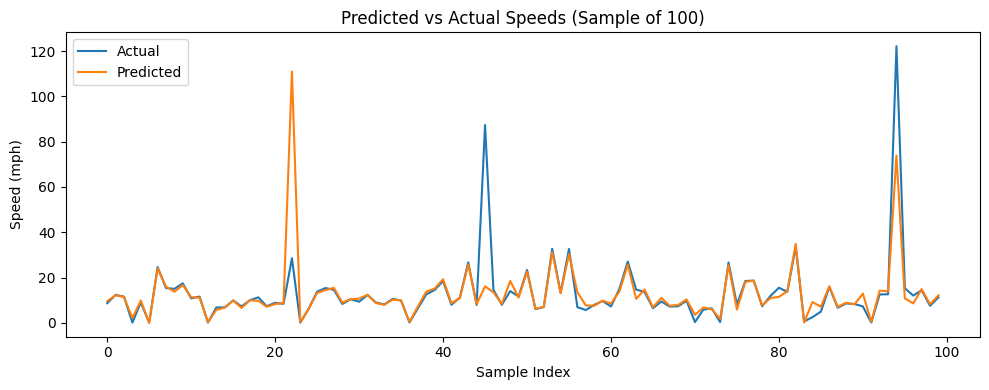

Model saved to C:\Users\VaishnaviM\Desktop\BIG_DATA\models\xgboost_model.pkl

Validating prediction for zone 0 at hour 15...
Predicted speed: 16.44 mph
Actual average speed: 6.45 mph
Absolute error: 9.99 mph


In [ ]:
# This traiAns the model, evaluates it, saves it, and optionally validates it
model = run_prediction_pipeline(input_path, model_output_path, validate=True)


In [4]:
# Load trained model from disk
loaded_model = joblib.load(model_output_path)


In [5]:
# Simulate upcoming hour input with lag values
sample = pd.DataFrame({
    'hour': [15],
    'lag_1': [18.5],
    'lag_2': [19.2],
    'lag_3': [17.8]
})

predicted_speed = loaded_model.predict(sample)
print(f"Predicted speed for hour 15: {predicted_speed[0]:.2f} mph")


Predicted speed for hour 15: 16.44 mph


In [6]:
# Load raw clustered data again for validation
df_raw = pd.read_parquet(input_path)

# Compare predicted vs actual average speed for zone 0 and hour 15
_ = validate_prediction(loaded_model, df_raw, hour=15, zone_id=0)



Validating prediction for zone 0 at hour 15...
Predicted speed: 16.44 mph
Actual average speed: 6.45 mph
Absolute error: 9.99 mph
